# Titanic: Machine Learning from Disaster

설명 및 데이터 원본 : https://www.kaggle.com/c/titanic

Pridict survival on the Titanic

- Defining the provlem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Feature selection
- Modeling
- Testing

In [28]:
import seaborn as sns
import pandas as pd
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Defining the provlem statement

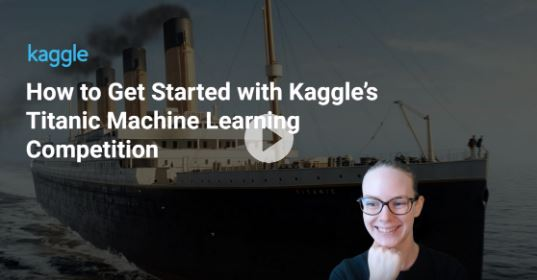

In [2]:
from IPython.display import Image
Image("./images/titanic.jpg")

In [3]:
캐글 링크 참조해서 description 추가

SyntaxError: invalid syntax (<ipython-input-3-3aa5a41ff75c>, line 1)

# 2. Collecting the data

In [8]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# 3. Exploratory data analysis

In [ ]:
train.head()

Data Dictionary

- Passengerid : 승객 아이디
- Survived : 생존 여부
- Pclass : 등급
- Name : 성함
- Sex : 성별
- Age : 나이
- SibSp : 형제, 자매, 배우자 수
- Parch : 부모, 자식 수
- Ticket : 티켓번호
- Fare : 요금
- Cabin : 좌석번호
- Embarked : 탑승 항구

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
결측치 분석

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Bar Chart for Categoricla Features

- Pclass
- Sex
- SibSp
- Parch
- Embarked

In [49]:
def bar_chart(feature) : 
    survived = train[train['Survived']==1][feature].value_counts()  # 생존자의 feature매개변수(칼럼) 값을 합산하여 변수에 저장
    dead = train[train['Survived']==0][feature].value_counts() # 위와같은 방식으로 사망자 총합을 변수에 저장
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))  # stacked는 누적 그래프 명령어. False로 주면 옆에 붙어서 나옴

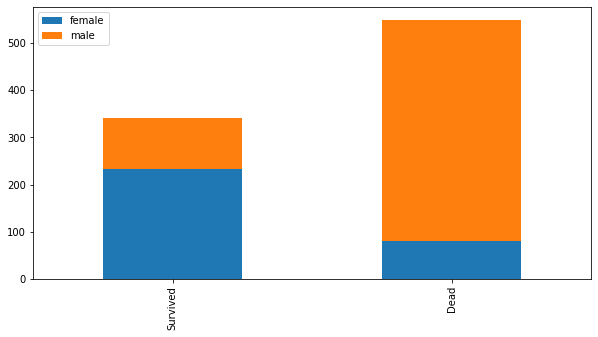

In [32]:
bar_chart('Sex')

해석 : 생존자 중 여성의 비율이 훨씬 높았다.

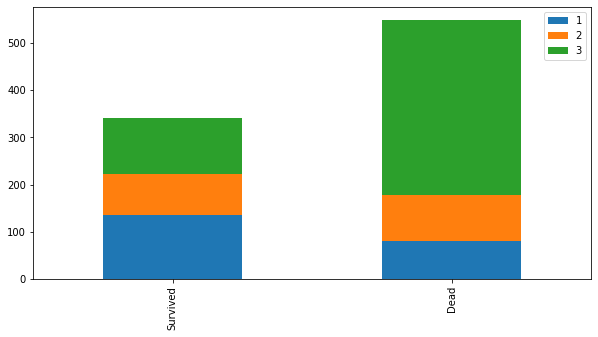

In [33]:
bar_chart('Pclass')

In [ ]:
해석 : 등급에 따른 생존률이 달랐다.

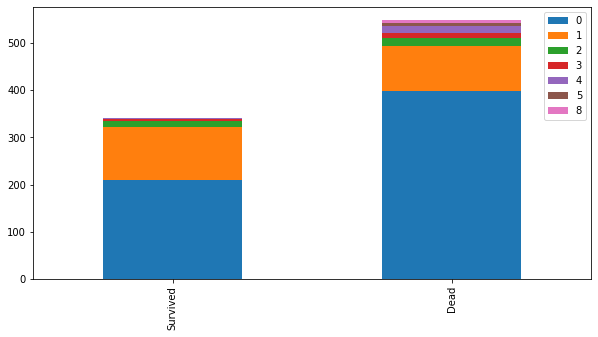

In [34]:
bar_chart('SibSp')

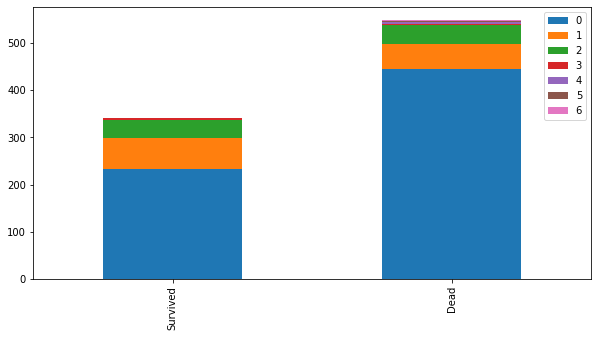

In [35]:
bar_chart('Parch')

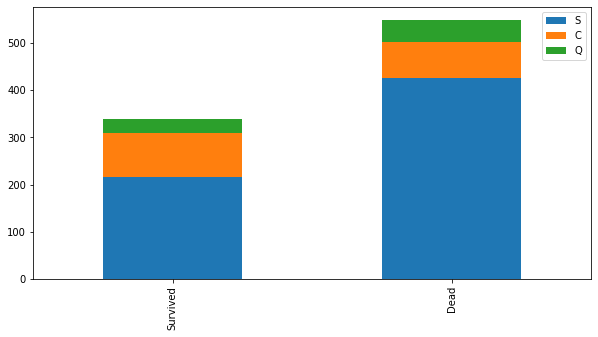

In [36]:
bar_chart('Embarked')

# 4. Feature engineering

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
컬럼들을 피처로 보면된다.
피처들을 백터(숫자들의 배열)로 만들어줘야한다. 

따라서 올바른 머신러닝 분석을 위해
1. 문자 속성을 가진 칼럼은 숫자로 바꿔준다.
2. NaN 값을 처리한다.

SyntaxError: invalid syntax (<ipython-input-40-e5a674b7931f>, line 1)

# 4.2 Name

In [8]:
dataset

NameError: name 'dataset' is not defined

In [9]:
두번째 질문은 정규식(regular expression)을 사용한 것인데요, 
공백이 있고 Mr, Mrs, Miss 있고, 
또 이름이 나오는 패턴에서 Mr, Mrs, Miss만 추출한다고 보시면 될 거 같습니다.

SyntaxError: invalid syntax (<ipython-input-9-a1b911a4fd50>, line 1)

In [9]:
train_test_data = [train, test]  # 두 데이터 프레임이 리스트의 형태로 합쳐져서 담김

for dataset in train_test_data :
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [10]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [11]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Don           1
Sir           1
Lady          1
Countess      1
Capt          1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [11]:
어떻게 자동으로 Title 칼럼이 추가된건지 이해가 안된다.

SyntaxError: invalid syntax (<ipython-input-11-c285f7acab57>, line 1)

In [12]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Major":3, "Mlle":3, "Col":3, "Jonkheer":3, "Dona":3, 
                 "Mme":3, "Ms":3, "Lady":3, "Don":3, "Countess":3, "Sir":3, "Capt":3}

for dataset in train_test_data :
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


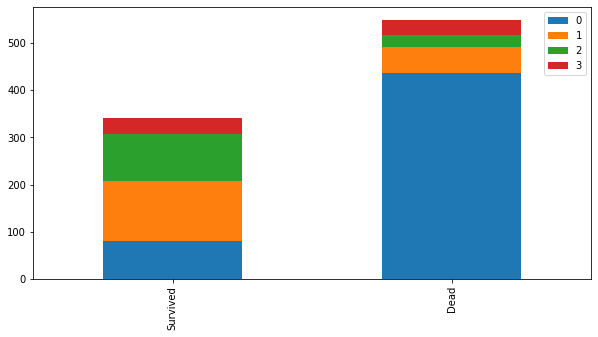

In [15]:
bar_chart('Title')

In [16]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [17]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,0


In [18]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0


# 4.3 Sex

In [19]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data : 
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [20]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.25,NaN,S,0


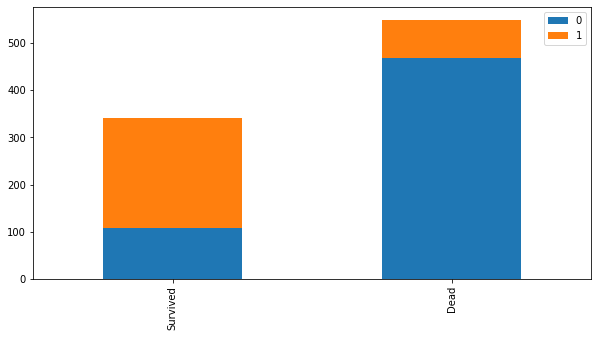

In [21]:
bar_chart('Sex')

# 4.4 Age

In [22]:
train['Age'].isnull().sum()

177

In [23]:
# 굳이 transform을 쓰는 이유가 뭐야
# train['Age'].fillna(train.groupby('Title')['Age'].median(), inplace=True)
# test['Age'].fillna(test.groupby('Title')['Age'].median(), inplace=True)

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

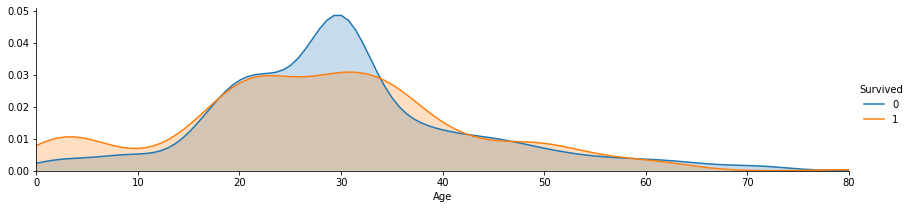

In [44]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

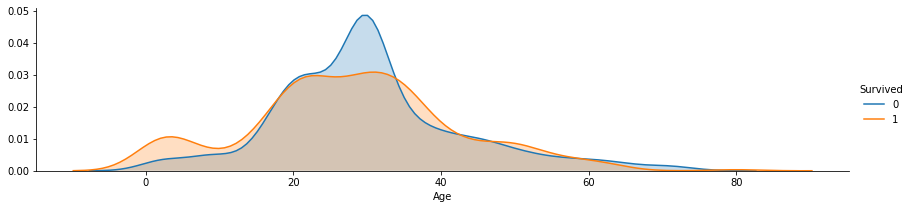

In [43]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
# facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

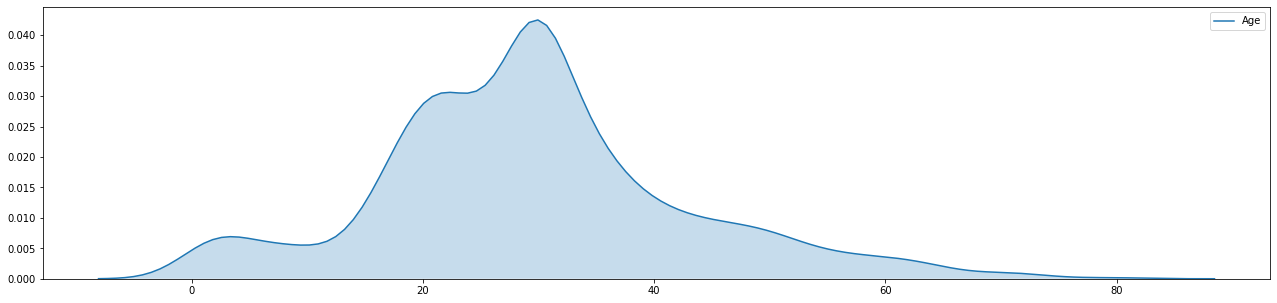

In [61]:
plt.figure(figsize=(22,5))
sns.kdeplot(train['Age'], shade=True)


In [ ]:
plt.figure(figsize=(22,10))
plt.xticks(rotation=45)
sns.lineplot(data=data_status)


In [ ]:
sns.lmplot(data=df_nonalcohol_sample_tr, 
           x='연령대코드(5세단위)', 
           y='트리글리세라이드', ci=None, hue='흡연상태', col='성별코드')

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

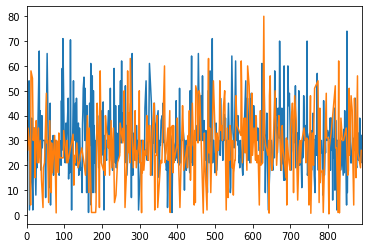

In [67]:
train.groupby('Survived')['Age'].plot()